In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
df=pd.read_csv('goog.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_data= scaler.fit_transform(df['Close'].values.reshape(-1,1)) # acc to question we look at close col value

In [6]:
training_size= int(len(scaled_data)*0.8) # 80 percent of data is training size
train_data=scaled_data[:training_size] # 0->training size
test_data=scaled_data[training_size:] # training size->end

In [7]:
def create_sequences(data, time_steps=6):
    x=[]
    y=[]
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps,0])
        y.append(data[i+time_steps,0])
    return np.array(x), np.array(y)

In [8]:
x_train, y_train= create_sequences(train_data)
x_test, y_test= create_sequences(test_data)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\Madhushri\tf-env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x_train,y_train,epochs=50, batch_size=4)

Epoch 1/50


C:\Users\Madhushri\tf-env\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1726
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0237
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0449
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0201
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0178
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0199
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0221
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0304
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0304
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0252
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0278
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0255
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0203
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0192
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0247
Epoch 16/50
11/

In [12]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred) #We have inverse transformed because we have scaled earlier
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  11.394252169084812
MSE:  133.9368176071876
RMSE:  11.57310751730872


In [15]:
last_6_days = df['Close'][-6:].values # last 6 values are taken
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
x_pred = []
x_pred.append(last_6_days_scaled)
x_pred = np.array(x_pred)
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1)) #sample, time_steps,features-> 1,6,1

In [16]:
pred_price = model.predict(x_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted price for the next day:  [[838.042]]


C:\Users\Madhushri\tf-env\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


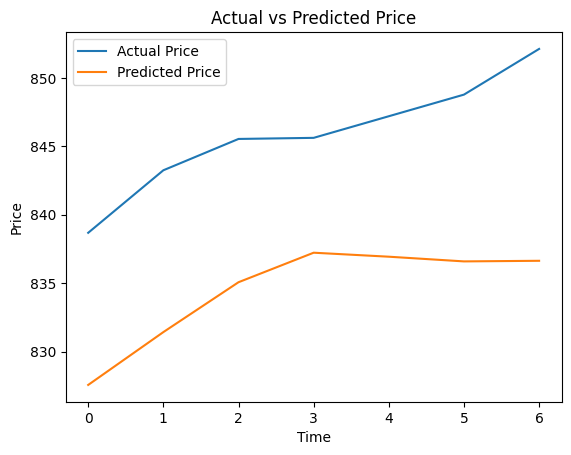

In [17]:
# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
